# Question 02.
The data contains lists of octamers (8 amino acids) and a flag (-1 or 1)
depending on whether HIV-1 protease will cleave in the central position (between amino acids 4
and 5). Build a machine learning model for the dataset, please refer document inside zip file for
additional information \
[https://drive.google.com/open?id=1Vm_zruT2djYympL0lG6_l57kAEhF5hxH]

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import importlib.util
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder()
import pickle

In [2]:
# Reading in the data
try:
    df = pd.read_csv("./newHIV_data/1625Data.txt", header=None, names=['peptide','HIV'])
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [3]:
df.head(5)   # Printing the first 10 rows of data

,peptide,HIV
0,SLNLRETN,1
1,AECFRIFD,1
2,HLVEALYL,1
3,TQIMFETF,1
4,AEELAEIF,1


In [4]:
df['peptide'].value_counts()

SLNLRETN    1
LRPSTSRS    1
ADLSEAAN    1
SKPDLTAA    1
EMRELRRQ    1
           ..
DKVLVVQP    1
TKVFVVQP    1
TKFLVVQP    1
RRANFLGK    1
SKDLIAEI    1
Name: peptide, Length: 1625, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   peptide  1625 non-null   object
 1   HIV      1625 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.5+ KB


In [6]:
df.describe()

,HIV
count,1625.000000
mean,-0.538462
std,0.842909
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


In [7]:
(df==np.NaN).any()

peptide    False
HIV        False
dtype: bool

In [8]:
df.head(5)

,peptide,HIV
0,SLNLRETN,1
1,AECFRIFD,1
2,HLVEALYL,1
3,TQIMFETF,1
4,AEELAEIF,1


### Data Transformation

In [9]:
def convert(dataframe):
    amino = dataframe['peptide']
    len_amino = len(amino[0])
    cols = ['Test'+'_'+str(num) for num in range (0,len(amino[0]))]
    # Adding new rows
    for item in cols:
        dataframe[item]=0
    for items in cols:
        dataframe[items] = np.NaN
    # converting each alphabet to feature
    for row in range(0,dataframe.shape[0]):
        for col in range (0,len_amino):
            dataframe.iloc[row,col+2] = amino[row][col]
    return dataframe

In [10]:
def one_hot_encode(dataframe):
    Y_train = dataframe['HIV']
    dataframe= dataframe.drop(columns=['peptide','HIV'],axis=1)
    dataframe = dataframe.apply(le.fit_transform)
    dataframe = dataframe.apply(pd.to_numeric)
    print("Before one hot encoding\n",dataframe.head())
    ohe.fit(dataframe)
    X_train = ohe.transform(dataframe)
    print("After encoding the shape of X train data is",X_train.shape)
    return X_train,Y_train

In [11]:
data = convert(df)

In [12]:
data.head()

,peptide,HIV,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7
0,SLNLRETN,1,S,L,N,L,R,E,T,N
1,AECFRIFD,1,A,E,C,F,R,I,F,D
2,HLVEALYL,1,H,L,V,E,A,L,Y,L
3,TQIMFETF,1,T,Q,I,M,F,E,T,F
4,AEELAEIF,1,A,E,E,L,A,E,I,F


In [13]:
data.isna().sum()

peptide    0
HIV        0
Test_0     0
Test_1     0
Test_2     0
Test_3     0
Test_4     0
Test_5     0
Test_6     0
Test_7     0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   peptide  1625 non-null   object
 1   HIV      1625 non-null   int64 
 2   Test_0   1625 non-null   object
 3   Test_1   1625 non-null   object
 4   Test_2   1625 non-null   object
 5   Test_3   1625 non-null   object
 6   Test_4   1625 non-null   object
 7   Test_5   1625 non-null   object
 8   Test_6   1625 non-null   object
 9   Test_7   1625 non-null   object
dtypes: int64(1), object(9)
memory usage: 127.1+ KB


## Training and testing the model

In [15]:
def DT_Classifier(X_train,Y_train,X_test,Y_test):
    classifier = DecisionTreeClassifier(criterion='entropy',random_state=2)
    classifier.fit(X_train,Y_train)
    file = open('Q2Classifier.pkl','wb')
    pickle.dump(classifier,file)
    file.close()
    Ypred=classifier.predict(X_test)
    print("Accuracy = ",accuracy_score(Ypred,Y_test)*100)

In [16]:
try:
    X_train,Y_train = one_hot_encode(data)
    X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.3,random_state=0)
    DT_Classifier(X_train,Y_train,X_test,Y_test)
except Exception as e:
    print(f"Error : {e}")

Before one hot encoding
    Test_0  Test_1  Test_2  Test_3  Test_4  Test_5  Test_6  Test_7
0      15       9      11       9      14       3      16      11
1       0       3       1       4      14       7       4       2
2       6       9      17       3       0       9      19       9
3      16      13       7      10       4       3      16       4
4       0       3       3       9       0       3       7       4
After encoding the shape of X train data is (1625, 160)
Accuracy =  90.98360655737704


### Validation  

In [17]:
# importing some components
from sklearn.tree import plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report

In [18]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
d1 = data.drop(['peptide','HIV'], axis=1).columns
print(d1)

Index(['Test_0', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5', 'Test_6',
       'Test_7'],
      dtype='object')


In [50]:
interim = pd.DataFrame(X_train) 

In [54]:
interim[0:1]

,0
0,"(0, 17)\t1.0\n (0, 20)\t1.0\n (0, 41)\t1.0..."


In [40]:
data['HIV'].nunique()

2

In [41]:
classNames = np.array([-1, 1])

IndexError: index 57 is out of bounds for axis 0 with size 8

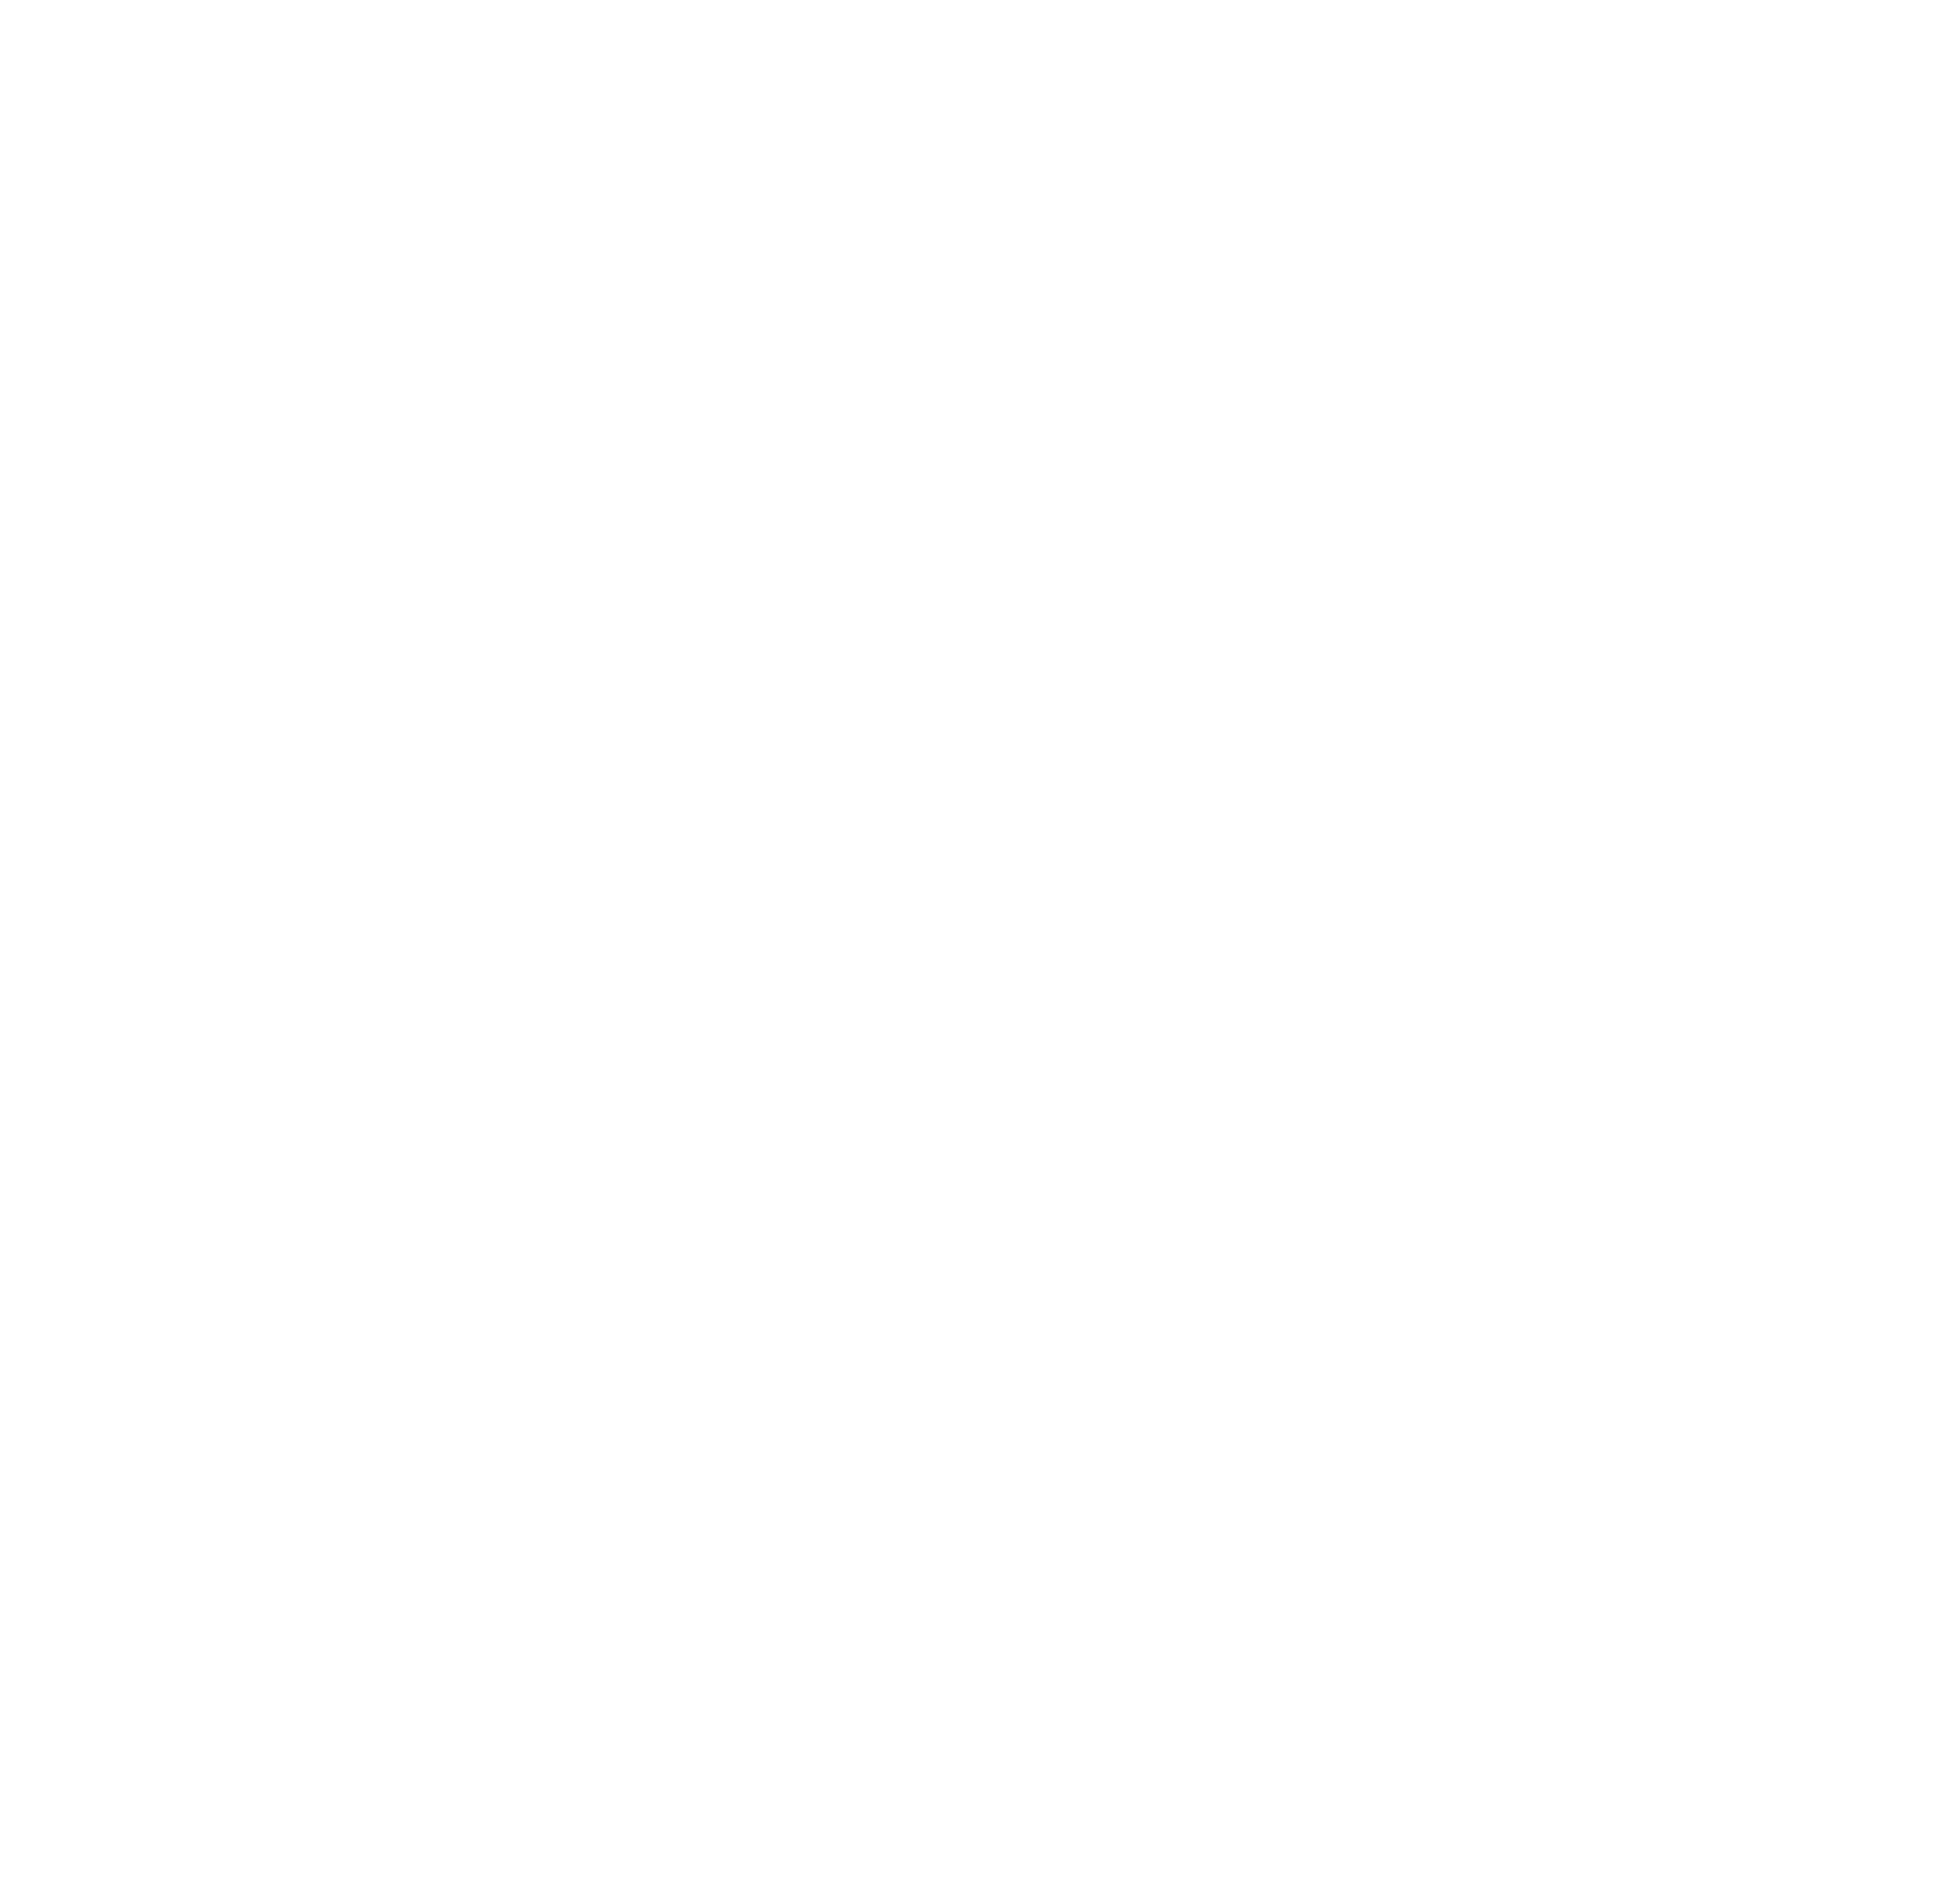

In [42]:
plt.figure(figsize=(5,5), dpi=1000)
plot_tree(full_tree, feature_names = d1,class_names = classNames, filled=True)
plt.show()

In [26]:
print(classification_report(Y_test, full_tree.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.93      0.94      0.93       368
           1       0.80      0.78      0.79       120

    accuracy                           0.90       488
   macro avg       0.87      0.86      0.86       488
weighted avg       0.90      0.90      0.90       488



### Simplify a Decision Tree with an Optimal Maximum Depth

In [29]:
max_depth = full_tree.get_depth()
print(max_depth)

13


In [30]:
max_depth_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}
    ),
)

In [31]:
max_depth_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x000002D24DFAAD70>,
             scoring=make_scorer(accuracy_score))

In [32]:
max_depth_grid_search.best_params_

{'max_depth': 9}

In [33]:
best_max_depth_tree = max_depth_grid_search.best_estimator_

In [34]:
best_max_depth = best_max_depth_tree.get_depth()
print(best_max_depth)

9


In [35]:
print(classification_report(Y_test, best_max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.91      0.96      0.93       368
           1       0.84      0.70      0.76       120

    accuracy                           0.89       488
   macro avg       0.87      0.83      0.85       488
weighted avg       0.89      0.89      0.89       488

